In [1]:
!pip install shapefile
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('data/dolakha.csv')
df1

,date,time,lati,long,magni,epic
0,4/25/2015,18:24,27.82,86.05,4.5,Dolakha
1,4/25/2015,19:21,27.69,86.02,4.9,Dolakha
2,4/25/2015,20:21,27.60,86.09,4.5,Dolakha
3,4/26/2015,5:26,27.67,86.07,4.5,Dolakha
4,4/26/2015,21:47,27.65,85.97,4.0,Dolakha
...,...,...,...,...,...,...
164,9/21/2017,13:04,27.62,86.25,4.6,Dolakha
165,12/8/2017,8:36,27.64,86.19,5.2,Dolakha
166,1/19/2018,8:38,27.72,86.01,4.3,Dolakha
167,2/27/2018,0:45,27.70,86.33,4.3,Dolakha


In [3]:
# Extract the data we're interested in
lat = df1['lati'].values
long = df1['long'].values
magn = df1['magni'].values

In [4]:
#opening the vector map
shp_path = 'Local_Unit\Local_Unit.shp'
#reading the shape file by using reader function of the shape lib
sf = shp.Reader(shp_path)
len(sf.shapes())

777

In [5]:
sf.records()

[Record #0: [1, 'TAPLEJUNG', 'Aathrai Tribeni', 'Gaunpalika', '1'],
 Record #1: [1, 'TAPLEJUNG', 'Maiwakhola', 'Gaunpalika', '1'],
 Record #2: [1, 'TAPLEJUNG', 'Meringden', 'Gaunpalika', '1'],
 Record #3: [1, 'TAPLEJUNG', 'Mikwakhola', 'Gaunpalika', '1'],
 Record #4: [1, 'TAPLEJUNG', 'Phaktanglung', 'Gaunpalika', '1'],
 Record #5: [1, 'TAPLEJUNG', 'Phungling', 'Nagarpalika', '1'],
 Record #6: [1, 'TAPLEJUNG', 'Sidingba', 'Gaunpalika', '1'],
 Record #7: [1, 'TAPLEJUNG', 'Sirijangha', 'Gaunpalika', '1'],
 Record #8: [1, 'TAPLEJUNG', 'Pathibhara Yangwarak', 'Gaunpalika', '1'],
 Record #9: [1, 'PANCHTHAR', 'Falelung', 'Gaunpalika', '1'],
 Record #10: [1, 'PANCHTHAR', 'Falgunanda', 'Gaunpalika', '1'],
 Record #11: [1, 'PANCHTHAR', 'Hilihang', 'Gaunpalika', '1'],
 Record #12: [1, 'PANCHTHAR', 'Kummayak', 'Gaunpalika', '1'],
 Record #13: [1, 'PANCHTHAR', 'Miklajung', 'Gaunpalika', '1'],
 Record #14: [1, 'PANCHTHAR', 'Phidim', 'Nagarpalika', '1'],
 Record #15: [1, 'PANCHTHAR', 'Tumbewa', 'Gaun

In [6]:
def read_shapefile(sf):
    #fetching the headings from the shape file
    fields = [x[0] for x in sf.fields][1:]
#fetching the records from the shape file
    records = [list(i) for i in sf.records()]
    shps = [s.points for s in sf.shapes()]
#converting shapefile data into pandas dataframe
    df = pd.DataFrame(columns=fields, data=records)
#assigning the coordinates
    df = df.assign(coords=shps)
    return df
df = read_shapefile(sf)
df.shape

(777, 6)

In [7]:
df.sample(5)


,STATE_CODE,DISTRICT,GaPa_NaPa,Type_GN,Province,coords
231,3,SINDHULI,Hariharpurgadhi,Gaunpalika,Bagmati,"[(85.49177145600004, 27.375001457000053), (85...."
665,6,HUMLA,Kharpunath,Gaunpalika,Karnali,"[(82.10661188900008, 30.34966220900003), (82.1..."
510,5,NAWALPARASI_W,Susta,Gaunpalika,5,"[(83.88289832900006, 27.507495645000063), (83...."
431,4,TANAHU,Shuklagandaki,Nagarpalika,Gandaki,"[(84.00698238700005, 28.11579315000006), (84.0..."
85,1,SANKHUWASABHA,Bhotkhola,Gaunpalika,1,"[(87.57352695800006, 27.86137627000005), (87.5..."


In [13]:
df.coords[1:5].T

1    [(87.50401795700003, 27.42900883200008), (87.5...
2    [(87.51271639500004, 27.56893727000005), (87.5...
3    [(87.68850327000007, 27.70974764500005), (87.6...
4    [(87.83673277000008, 27.95136883200007), (87.8...
Name: coords, dtype: object

In [9]:
def plot_shape(id, s=None):
    plt.figure()
    #plotting the graphical axes where map ploting will be done
    ax = plt.axes()
    ax.set_aspect('equal')
#storing the id number to be worked upon
    shape_ex = sf.shape(id)
#NP.ZERO initializes an array of rows and column with 0 in place of each elements 
    #an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
    x_lon = np.zeros((len(shape_ex.points),1))
#an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
#plotting using the derived coordinated stored in array created by numpy
    plt.plot(x_lon,y_lat)
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.xlabel('Langitude($^o$ E)',color='k', fontsize=16) 
    plt.ylabel('Latitude($^o$ N)',color='k', fontsize=16)    
    plt.title(s,color='r', fontsize=20)
# use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

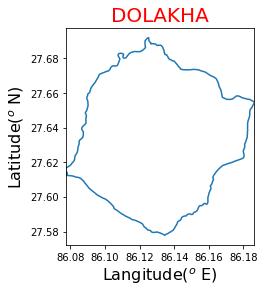

In [10]:
DISTRICT = 'DOLAKHA'
#to get the id of the city map to be plotted
com_id = df[df.DISTRICT == 'DOLAKHA'].index.values[0]
plot_shape(com_id, DISTRICT)
sf.shape(com_id)